# Employee Salary Dataset

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [156]:
#Reading the Dataset
sal = pd.read_csv('salaries.csv')

In [157]:
print(sal.shape)
sal.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [158]:
print(sal['Salary'].mean())

76003.0


In [159]:
#Checking Null Values
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

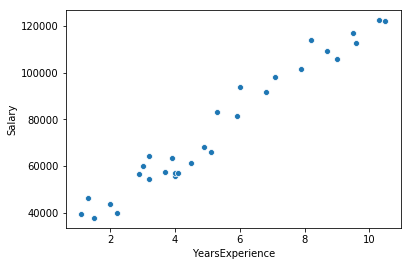

In [178]:
#EDA Visualizations
sns.scatterplot(x='YearsExperience',y='Salary',data=sal)

In [160]:
# Selecting input and output Values
X = sal.iloc[:, 0:1].values
y = sal.iloc[:, 1].values

In [161]:
#Training and Testing Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [162]:
#Standadization of Training and Testing Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [164]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [165]:
model.score(X_test, y_test)

0.9024461774180498

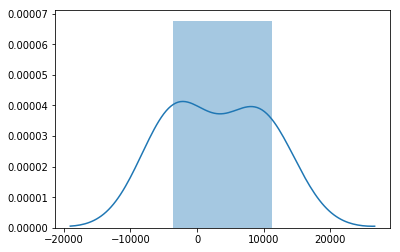

In [166]:
sns.distplot(y_test-y_pred)
plt.show()

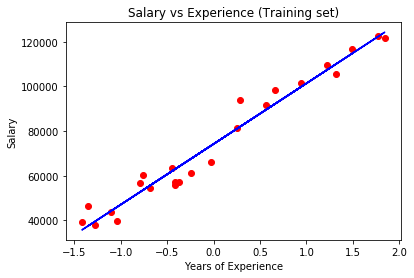

In [167]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

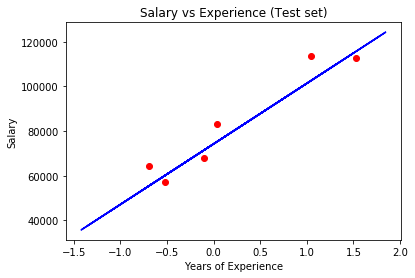

In [168]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

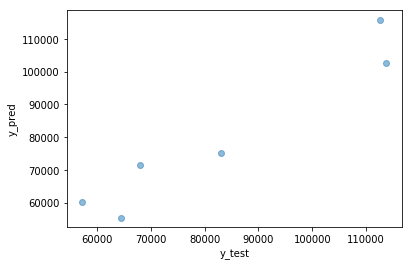

In [169]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [172]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6286.453830757746
MSE: 49830096.85590834
RMSE: 7059.043621901506


In [173]:
metrics.r2_score(y_test, y_pred)

0.9024461774180498